<a href="https://colab.research.google.com/github/gui98araujo/Amb_Git/blob/main/Regressao_linear_multipla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
limite=pd.read_excel('/content/Cópia de Limite_Credito1.xlsx')

In [4]:
limite.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial
0,70,10736,5214,400,500
1,68,5000,5000,380,600
2,44,5800,5800,500,800
3,72,4300,4300,2000,1000
4,75,4400,4400,3000,1000


In [5]:
limite.corr()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial
Idade,1.000000,0.066396,0.063227,0.064149,0.075883
RendimentoTotal,0.066396,1.000000,0.960551,0.031041,0.858120
Salario,0.063227,0.960551,1.000000,0.081792,0.888839
LimitedeCreditoImediato,0.064149,0.031041,0.081792,1.000000,0.226990
LimitedoChequeEspecial,0.075883,0.858120,0.888839,0.226990,1.000000


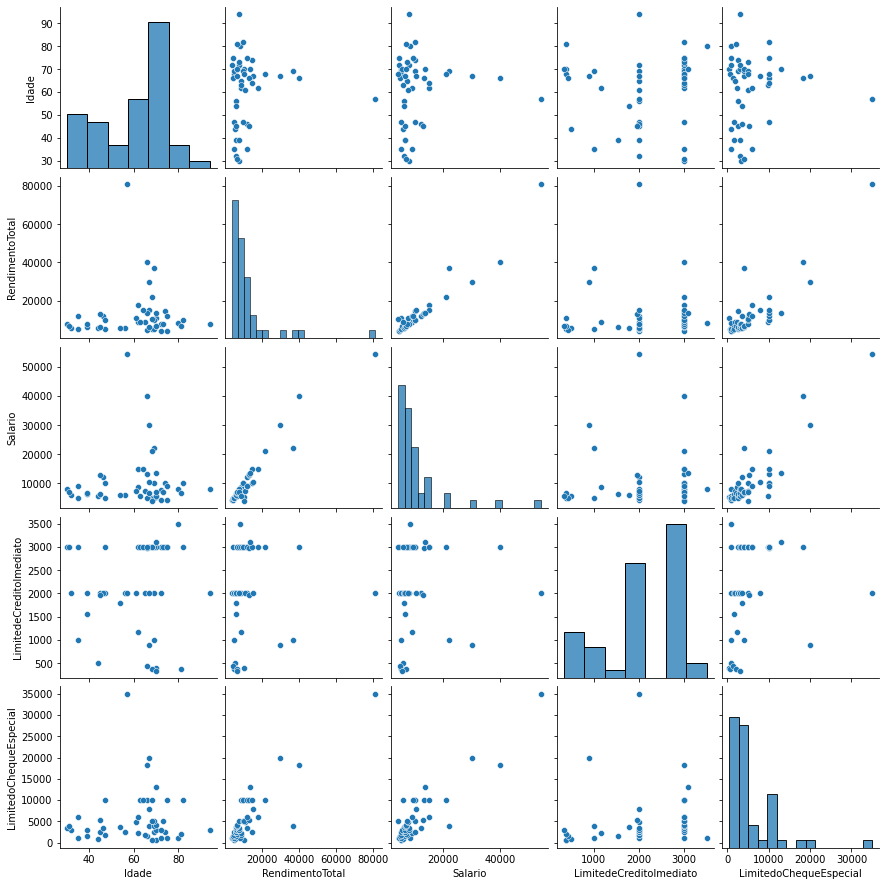

In [6]:
sns.pairplot(limite);

In [7]:
import statsmodels.formula.api as smf

In [8]:
#criar uma função para adicionar e remover variáveis
function='LimitedoChequeEspecial~Idade+RendimentoTotal+Salario+LimitedeCreditoImediato'

In [9]:
model=smf.ols(formula=function,data=limite).fit()

In [10]:
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.816
Model:                                OLS   Adj. R-squared:                  0.799
Method:                     Least Squares   F-statistic:                     47.65
Date:                    Wed, 30 Nov 2022   Prob (F-statistic):           2.92e-15
Time:                            13:44:57   Log-Likelihood:                -445.61
No. Observations:                      48   AIC:                             901.2
Df Residuals:                          43   BIC:                             910.6
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [11]:
#vamos tirar a idade por ser o maior p-value (Utilizaremos o método backward)

In [12]:
function='LimitedoChequeEspecial~+RendimentoTotal+Salario+LimitedeCreditoImediato'

In [13]:
model=smf.ols(formula=function,data=limite).fit()

In [14]:
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.816
Model:                                OLS   Adj. R-squared:                  0.803
Method:                     Least Squares   F-statistic:                     64.97
Date:                    Wed, 30 Nov 2022   Prob (F-statistic):           3.34e-16
Time:                            13:44:57   Log-Likelihood:                -445.62
No. Observations:                      48   AIC:                             899.2
Df Residuals:                          44   BIC:                             906.7
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [15]:
function='LimitedoChequeEspecial~Salario+LimitedeCreditoImediato'
model=smf.ols(formula=function,data=limite).fit()
print(model.summary())
#Agora podemos seguir com o modelo de regressão

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.814
Model:                                OLS   Adj. R-squared:                  0.806
Method:                     Least Squares   F-statistic:                     98.47
Date:                    Wed, 30 Nov 2022   Prob (F-statistic):           3.66e-17
Time:                            13:44:58   Log-Likelihood:                -445.86
No. Observations:                      48   AIC:                             897.7
Df Residuals:                          45   BIC:                             903.3
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

#Lucro#

In [16]:
#Usar p-value até 5%
lucro=pd.read_excel('/content/C├│pia de Exercicio_Lucro.xlsx')
lucro.head()

,Investimento,Investimento_Mkt,Gastos_Administrativos,Lucro
0,0,45173,116984,14681
1,542,0,51743,35673
2,0,0,135427,42560
3,1315,297114,115816,49491
4,1000,1904,124153,64926


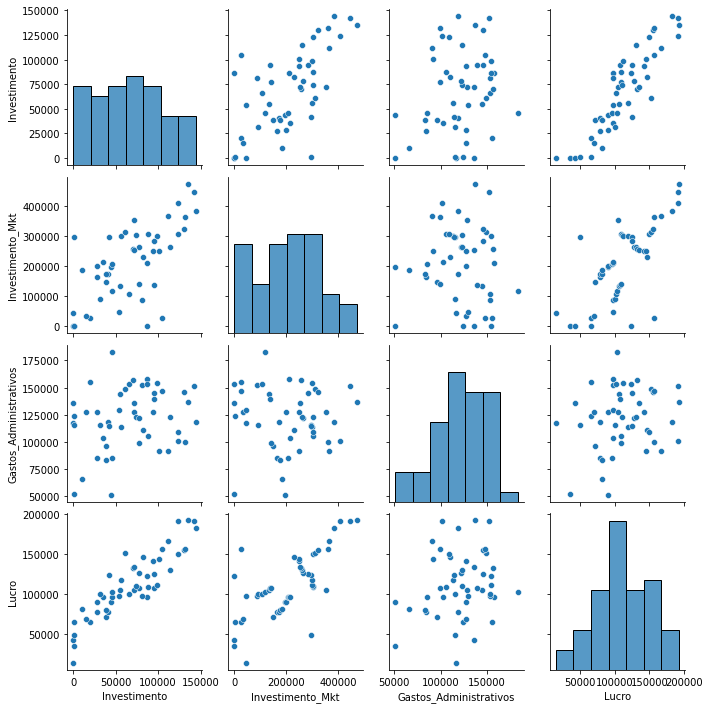

In [17]:
sns.pairplot(lucro);

In [18]:
function='Lucro~Gastos_Administrativos+ Investimento_Mkt+ Investimento'
model=smf.ols(formula=function,data=lucro).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Lucro   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     75.97
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           7.60e-18
Time:                        13:45:04   Log-Likelihood:                -556.05
No. Observations:                  50   AIC:                             1120.
Df Residuals:                      46   BIC:                             1128.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               4.21

In [19]:
function='Lucro~ Investimento_Mkt+ Investimento'
model=smf.ols(formula=function,data=lucro).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Lucro   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     115.7
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           7.01e-19
Time:                        13:45:39   Log-Likelihood:                -556.18
No. Observations:                  50   AIC:                             1118.
Df Residuals:                      47   BIC:                             1124.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.758e+04   5004.534  